# Jesus Olivera <br>

### AIM 5001 Project <br>




# <span style="color:olive">Introduction</span>

The Airport Operation's Managers from the George Bush Intercontinental Airport (IAH) and William P. Hobby Airport (HOU) contracted my services to perform a data analysis of their traffic volume during the months of January and  February of 2011 for the purpose of providing them with a Q1 2012 staffing and scheduling recommendation for the personnel at the airports terminals. To perform the analysis and provide the recommendation, I will be using departure and arrival delays data from the airlines as well as the date and time of the delays. I will seek to  understand the staffing and scheduling needs based on the answers to the following question.<br>

#### How does the data about departure and arrival delays can provide the Airports Operations Managers with insights to consider when staffing and scheduling employees?

**Breakdown of the research question**


  1.What is the total count of arrival and departure delays over 15 minutes per month? <br>
  2.What days of the month recorded the highest number of arrival and departure delays? <br>
  3.Durring what times of the day do airlines experience most arrival and departure delays? <br>
  4.Which airlines experienced the highest number of delays during the mornings, afternoons and evenings? <br>
 

# <span style="color:olive">Methodology</span>

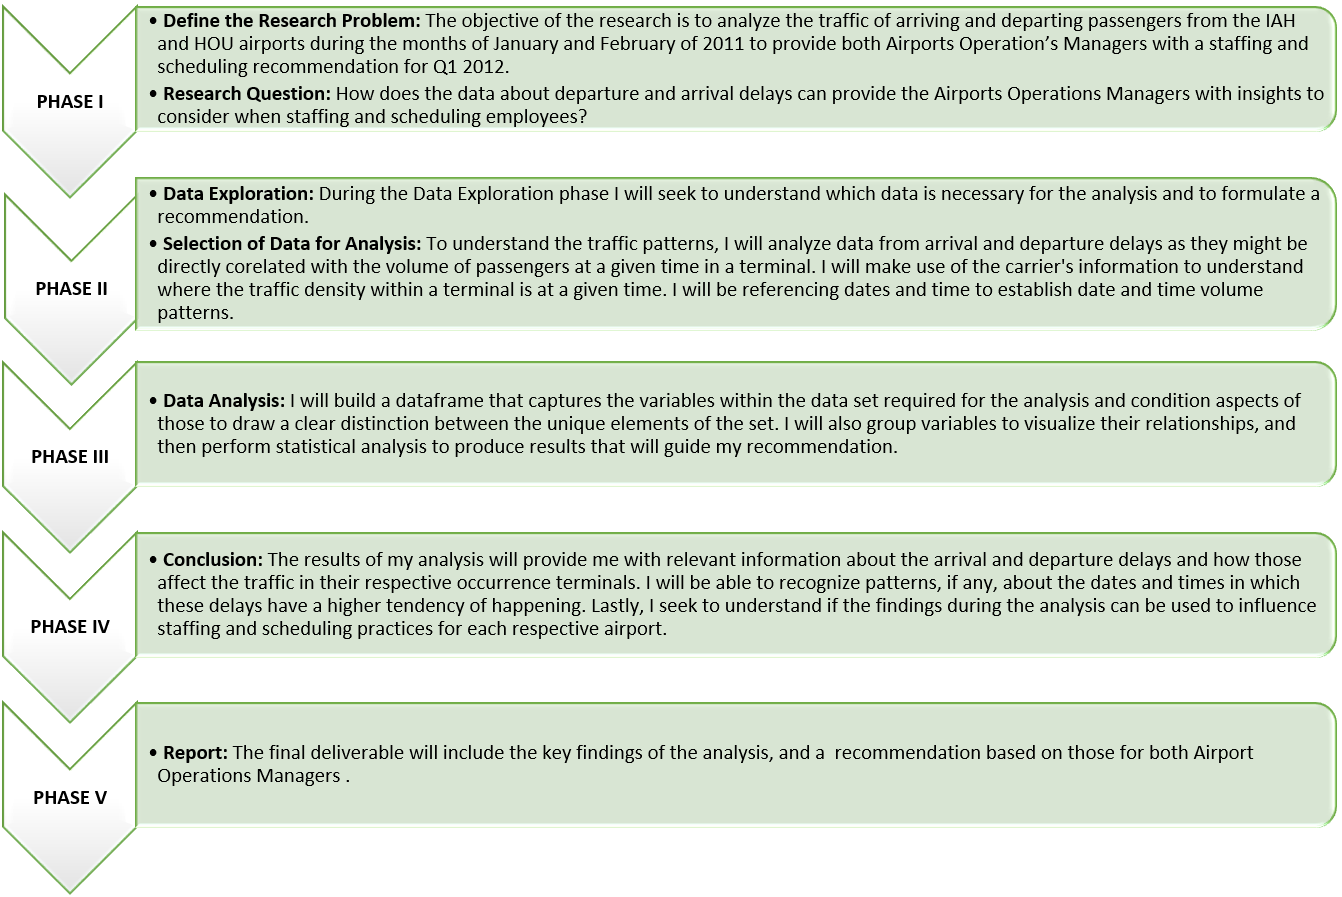


# <span style="color:olive">Data Preparation</span>

I decided the relevant data for my analysis was in the columns "Month", "DayofMonth", "DepTime", "ArrTime", "UniqueCarrier", "ArrDelay", "DepDelay" and "Origin". To prepare the data I created a new dataframe containing only those variables mentioned above. To analyze the traffic patterns in each airport, I created a dataframe for each airport using the variable "Origin" as the condition. To ensure the integrity of my analysis, I also created another parameter that specifies that only departure and arrival delays greater than 15 minutes will be evaluated. To reference the time of the day in which delays occurred, I added time constraints for the evaluation categorizing the results by am, pm and evening. Using statistical analysis, I have created new columns. The new column names reference their mathematical function for the ease of the analysis. 

### <span style="color:olive">Python Code Description</span>
**For this section, I will only present the code used to prepare the data for analysis regarding the departure time and departure delays from the airport IAH. For the rest of the data preparation the codes are the similar with distinction of the origin ("Origin") being HOU, and instead of departure time ("DepTime") and departure delays ("DepDelay"), the code uses arrival time ("ArrTime") and arrival delays ("ArrDelay").** 

1. I imported the module "pandas" as pd
2. I imported the csv data file from "github"
3. I assigned the data to a variable called "data"
4. I created a dataframe using pandas module and named it df
5. I created another dataframe called data2 only containing the desired data for the analysis
6. I created three dataframes called data_IAH_am, data_IAH_pm and data_IAH_night; each references the time of the day am, pm and night they are analyzing. The dataframes also filter departure times and delays times greater than 15 minutes from the airport IAH. 
7. The next step will be to perform the statistical analysis

**(Variable names will vary in the actual analysis depending on its referencing purpose, but the format is similar to that shown above.)** 

In [29]:

import pandas as pd

filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
data = pd.read_csv(filename)

df = pd.DataFrame(data)
data2= df[["Month","DayofMonth","DepTime","ArrTime","UniqueCarrier","ArrDelay","DepDelay","Origin"]]
data_IAH_am = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.DepTime >= 600)&(df.DepTime <= 1200)]
data_IAH_pm = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.DepTime >= 1201)&(df.DepTime <= 1800)]
data_IAH_night = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.DepTime >= 1801)&(df.DepTime <= 2400)]


#  <span style="color:olive">Exploratory Data Analysis</span>
<br>

### <span style="color:olivedrab">A. IAH Airport Data Analysis </span>

  **A.1 Airport departure delays over 15 minutes during the morning, afternoon and evening per airline:** 
<br>

 


Continental Airlines (CO) and Express Jet (XE) had the highest departure delay times during the morning.

               count    max       mean     sum
UniqueCarrier                                 
AA                21  122.0  43.476190   913.0
CO               196  780.0  45.443878  8907.0
DL                 8  236.0  78.500000   628.0
MQ                11   49.0  36.545455   402.0
OO                32  208.0  53.312500  1706.0
UA                 4  134.0  50.250000   201.0
US                 8  135.0  49.500000   396.0
XE               135   95.0  34.770370  4694.0

The grand total of time in departure delays during the mornings of January and February 2011 was:
17847.0


Continental Airlines (CO) and Express Jet (XE) had the highest departure delay times during the afternoon.

               count    max       mean      sum
UniqueCarrier                                  
AA                28   90.0  42.642857   1194.0
CO               504  351.0  41.648810  20991.0
DL             

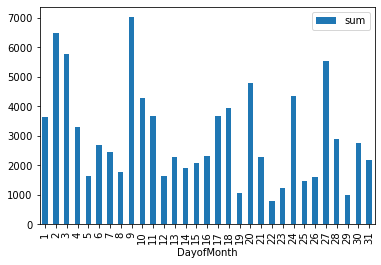

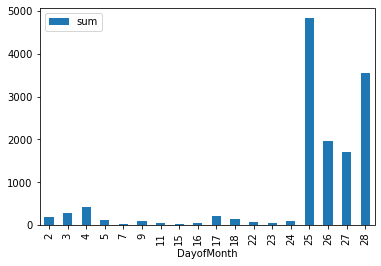

In [30]:
# Importing pandas:
import pandas as pd

# Dataframe "data" has been assigned to the variable "df"
df = pd.DataFrame(data)

# New dataframe called data2 was created with the variables pertinent for the analysis 
data2= df[["Month","DayofMonth","DepTime","ArrTime","UniqueCarrier","ArrDelay","DepDelay","Origin"]]

# To specify the delay time I used a greatter than 15 min filter and to filter the time, 
# I added filters with starting time and ending time
# Dataframe filters are departure delays during the morning in airport IAH
data_IAH_am = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.DepTime >= 600)&(df.DepTime <= 1200)]

# Dataframe filters are departure delays during the afternoon in airport IAH
 
data_IAH_pm = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.DepTime >= 1201)&(df.DepTime <= 1800)]

# Dataframe filter are departure delays during the evening in airport IAH
data_IAH_night = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.DepTime >= 1801)&(df.DepTime <= 2400)]

# Print results codes:
print("\033[1m" + 'Continental Airlines (CO) and Express Jet (XE) had the highest departure delay times during the morning.'+"\033[0m")
print('')
# Print am results. The analysis uses the parameters stablished above, group by carrier and counts, provide maximun number
# of delay time, mean and sum of those time delays
print(data_IAH_am.groupby('UniqueCarrier').DepDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of time in departure delays during the morning 
print("\033[1m" +'The grand total of time in departure delays during the mornings of January and February 2011 was:'+"\033[0m")
# Variable "total_am_delay" sums all the departure delays time over 15 min to provide a grand total and the next line 
# prints the variable results
total_am_delay = data_IAH_am['DepDelay'].sum()
print(total_am_delay)
print('')
print('')
#-------------------------------------------------------------------------------------------------
# Print results codes:
print("\033[1m" + 'Continental Airlines (CO) and Express Jet (XE) had the highest departure delay times during the afternoon.'+"\033[0m")
print('')
# Print pm results. The analysis uses the parameters stablished above, group by carrier and counts, provide maximun number
#of delay time, mean and sum of those time delays 
print(data_IAH_pm.groupby('UniqueCarrier').DepDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of departure delays during the afternoon 
print("\033[1m" +'The grand total of time in departure delays during the afternoons of January and February 2011 was:'+"\033[0m")
# Variable "total_pm_delay" sums all departure delays time over 15 min to provide a grand total and the next line 
# prints the variable results
total_pm_delay = data_IAH_pm['DepDelay'].sum()
print(total_pm_delay)
print('')
print('')

#------------------------------------------------------------------------------------------------
# Print results codes: 
print("\033[1m" + 'Continental Airlines (CO) and Express Jet (XE) had the highest departure delay times during the evening.'+"\033[0m")
print('')
# Print evening results. The analysis uses the parameters stablished above, group by carrier and counts, provide maximun number
#of delay time, mean and sum of those time delays
print(data_IAH_night.groupby('UniqueCarrier').DepDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of departure delays during the evening 
print("\033[1m" +'The grand total of time in departure delays during the evenings of January and February 2011 was:'+"\033[0m")
# Variable "total_pm_night" sums all departure delays time over 15 min to provide a grand total and the next line
# prints the variable results
total_pm_night = data_IAH_night['DepDelay'].sum()
print(total_pm_night)
print('')
print('')
print('')

#-------------------------------------------------------------------------------------------------

# I created a new dataframe filtering the origin, delays, and month to calculate the grand total count of delays
# during each month.

# January
# This dataframe specifies "Month" = 1
data_IAH_jan_count = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.Month == 1)]
# I used group by carrier and counted the amount of delays over 15 min
data_IAH_jan_count.groupby('UniqueCarrier').DepDelay.agg(['count'])
# A new variable was created to contain the results
dep_jan = data_IAH_jan_count['DepDelay'].count()
print("\033[1m" + '**The grand total of number of departure delays over 15 minutes during the month of January 2011 was:' +"\033[0m")
# Printing results:
print(dep_jan)
print('')

# February 
# This dataframe specifies "Month" = 2
data_IAH_feb_count = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.Month == 2)]
# I used the group by carrier and counted the amount of delays over 15 min
data_IAH_feb_count.groupby('UniqueCarrier').DepDelay.agg(['count'])
# A new variable was created to contain the results
dep_feb= data_IAH_feb_count['DepDelay'].count()
print("\033[1m" + '**The grand total of number of departure delays over 15 minutes during the month of February 2011 was:' +"\033[0m")
# Printing results:
print(dep_feb)
print('')
print('')

#----------------------------------------------------------------------------------------------------
# To create the graphs, I am using matplotlib inline
%matplotlib inline
# Graph tittle and description
print("\033[1m" +'Departure Delays per Month & Day'+"\033[0m")
print("\033[1m" +'The first graph shows the results from January 2011 & the second graph show the results from February 2011'+"\033[0m")

# Filtering to use only month = 1 (January)
jan_dep = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.Month == 1)]
# Create the graph grouping by day of the month adding all the departure delays per day.
jan_dep.groupby('DayofMonth').DepDelay.agg(['sum']).plot(kind='bar')

#Filtering to use only month = 2 (February)
feb_dep = data2[(df.Origin == "IAH")&(df.DepDelay > 15)&(df.Month == 2)]
# Create the graph grouping by day of the month adding all the departure delays per day.
feb_dep.groupby('DayofMonth').DepDelay.agg(['sum']).plot(kind='bar')



<br> 
      **<span style="color:olivedrab">A.2 Airport arrival delays over 15 minutes during the morning, afternoon and evening per airline:</span>**   



Continental Airlines (CO) and Express Jet (XE) have the highest arrival delay times during the morning.

               count    max       mean     sum
UniqueCarrier                                 
AA                17  129.0  41.000000   697.0
CO                95  775.0  37.126316  3527.0
DL                 5   63.0  32.400000   162.0
MQ                 6   91.0  47.833333   287.0
OO                37   84.0  34.459459  1275.0
UA                 3   28.0  22.666667    68.0
US                 1   57.0  57.000000    57.0
XE               117   87.0  29.504274  3452.0

The grand total time of arrival delays during the mornings of January and February 2011 was:
9525.0

Continental Airlines (CO) and Express Jet (XE) have the highest arrival delay times during the afternoon.

               count    max        mean      sum
UniqueCarrier                                   
AA                29   92.0   43.103448   1250.0
CO               477  264.0   38.142558  18194.0
DL                 4

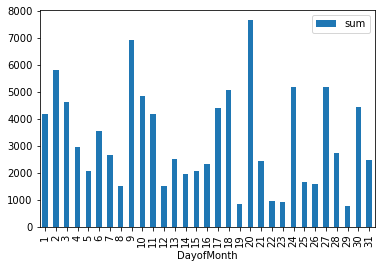

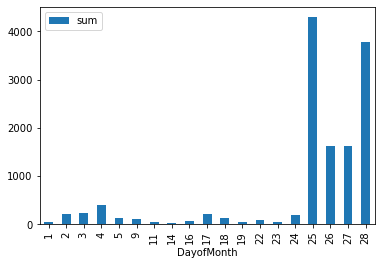

In [31]:
import pandas as pd

# Dataframe data has been assigned to the variable "df"
df = pd.DataFrame(data)

# New dataframe called data3 was created with the variables pertinent for the analysis 
data3= df[["Month","DayofMonth","DepTime","ArrTime","UniqueCarrier","ArrDelay","DepDelay","Origin"]]

# Dataframe filters arrival delays over 15 min during the morning from 6 am to 12 pm in the IAH airport
data_IAH_am_arr = data3[(df.Origin == "IAH")&(df.ArrDelay > 15)&(df.ArrTime >= 600)&(df.ArrTime <= 1200)]

# Dataframe filters arrival delays over 15 min during the afternoon from 12:01 pm to 6 pm in the IAH airport
 
data_IAH_pm_arr = data3[(df.Origin == "IAH")&(df.ArrDelay > 15)&(df.ArrTime >= 1201)&(df.ArrTime <= 1800)]

# Dataframe filters arrival delays over 15 min during the evening from 6:01 pm to 12:00 am in the IAH airport
data_IAH_night_arr = data3[(df.Origin == "IAH")&(df.ArrDelay > 15)&(df.ArrTime >= 1801)&(df.ArrTime <= 2400)]

# Print results codes:
print("\033[1m" + 'Continental Airlines (CO) and Express Jet (XE) have the highest arrival delay times during the morning.'+"\033[0m")
print('')
# I used the group by carrier function and performs counting, max, mean and sum to the am arrival time delays 
print(data_IAH_am_arr.groupby('UniqueCarrier').ArrDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of time in arrival delays during the mornings 
print("\033[1m" +'The grand total time of arrival delays during the mornings of January and February 2011 was:'+"\033[0m")
# Sum of all am arrival time delays over 15 min
total_am_arr = data_IAH_am_arr['ArrDelay'].sum()
# Variable containing results is printed
print(total_am_arr)
print('')

#------------------------------------------------------------------------------------------------------
# Print results codes:
print("\033[1m" + 'Continental Airlines (CO) and Express Jet (XE) have the highest arrival delay times during the afternoon.'+"\033[0m")
print('')
# I used the group by carrier function and performs counting, max, mean and sum to the pm arrival time delays 
print(data_IAH_pm_arr.groupby('UniqueCarrier').ArrDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of arrival delays during the afternoons 
print("\033[1m" +'The grand total time of arrival delays during the afternoons of January and February 2011 was:'+"\033[0m")
# Sum of all pm arrival time delays over 15 min 
total_pm_arr = data_IAH_pm_arr['ArrDelay'].sum()
# Variable containing the results is printed 
print(total_pm_arr)
print('')

#------------------------------------------------------------------------------------------------------

# Print results codes:
print("\033[1m" + 'Continental Airlines (CO) and Express Jet (XE) have the highest arrival delay times during the evening.'+"\033[0m")
print('')
# I used the group by carrier function and performs counting, max, mean and sum to the evening (night) arrival time delays
print(data_IAH_night_arr.groupby('UniqueCarrier').ArrDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of arrival delays during the evenings 
print("\033[1m" +'The grand total time of arrival delays during the evenings of January and February 2011 was:'+"\033[0m")
# Sum of all evening (night) arrival delays over 15 min
total_night_arr = data_IAH_night_arr['ArrDelay'].sum()
# Variable containing the results is printed
print(total_night_arr)
print('')
print('')
print('')
#-----------------------------------------------------------------------------------------------------

# I created a new dataframe filtering the origin, delays and month to calculate the grand total count of delays
# during each month.

# January
# Dataframe filters origin as "IAH", departure time over 15 min and "Month" = 1 (January)
data_IAH_jan_countarr = data2[(df.Origin == "IAH")&(df.ArrDelay > 15)&(df.Month == 1)]
# Group by carrier and count the amount of arrival delays over 15 min
data_IAH_jan_countarr.groupby('UniqueCarrier').ArrDelay.agg(['count'])
# Variable "arr_jan" contains the results
arr_jan = data_IAH_jan_countarr['ArrDelay'].count()
print("\033[1m" + '**The grand total of number of arrival delays over 15 minutes during the month of January 2011 was:' +"\033[0m")
# Variable containing results is printed
print(arr_jan)
print('')


# February
# Dataframe filters origin as "IAH", departure delays time over 15 min and "Month" = 2 (February)
data_IAH_feb_countarr = data2[(df.Origin == "IAH")&(df.ArrDelay > 15)&(df.Month == 2)]
# Group by carrier and count the amount of arrival delays over 15 min 
data_IAH_feb_countarr.groupby('UniqueCarrier').ArrDelay.agg(['count'])
# Variable "arr_feb" contains the results
arr_feb= data_IAH_feb_countarr['ArrDelay'].count()
print("\033[1m" + '**The grand total of number of arrival delays over 15 minutes during the month of February 2011 was:' +"\033[0m")
# Variable containing results is printed 
print(arr_feb)
print('')
print('')

#-------------------------------------------------------------------------------------------------------

# To create the graphs I am using matplotlib inline
%matplotlib inline
# Graph tittle and description
print("\033[1m" +'Arrival Delays per Month & Day'+"\033[0m")
print("\033[1m" +'The first graph shows the results from January 2011 & the second graph show the results from February 2011'+"\033[0m")

# Filtering to use only month = 1 (January)
jan_arr = data2[(df.Origin == "IAH")&(df.ArrDelay > 15)&(df.Month == 1)]
# Create the graph grouping by day of the month adding all the departure delays per day.
jan_arr.groupby('DayofMonth').ArrDelay.agg(['sum']).plot(kind='bar')

#Filtering to use only month = 2 (February)
feb_arr = data2[(df.Origin == "IAH")&(df.ArrDelay > 15)&(df.Month == 2)]
# Create the graph grouping by day of the month adding all the departure delays per day.
feb_arr.groupby('DayofMonth').ArrDelay.agg(['sum']).plot(kind='bar')


### <span style="color:olive"> B. HOU Airport Data Analysis</span>

  **<span style="color:olivedrab">B.1 Airport departure delays over 15 minutes during the morning, afternoon and evening per airline:</span>**

Southwest Airlines (WN) and Envoy Airlines (MQ) have the highest departure delay times during the mornings.

               count    max        mean     sum
UniqueCarrier                                  
B6                 4  247.0  103.500000   414.0
DL                 4   64.0   37.500000   150.0
F9                 3   57.0   35.666667   107.0
FL                 4  114.0   46.000000   184.0
MQ                 8  194.0   57.750000   462.0
WN               132   90.0   30.454545  4020.0

The grand total of time in departure delays during the mornings of January and February 2011 weas:
5337.0


Southwest Airlines (WN) and JetBlue Airline (B6) have the highest departure delay times during the afternoons.

               count    max       mean      sum
UniqueCarrier                                  
B6                14  127.0  58.500000    819.0
DL                 6  132.0  64.666667    388.0
F9                 8   75.0  40.375000    323.0
FL                 5   41.0  29.800000    149.

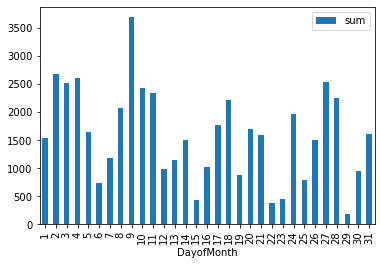

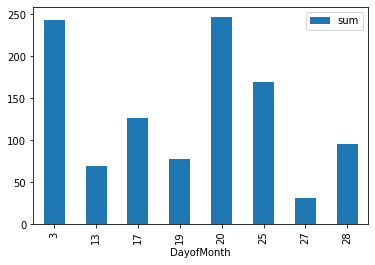

In [32]:
# Importing pandas as pd
import pandas as pd


# Dataframe data has been assigned to the variable "df"
df = pd.DataFrame(data)

# New dataframe called data2 was created with the variables pertinent for the analysis 
data2= df[["Month","DayofMonth","DepTime","ArrTime","UniqueCarrier","ArrDelay","DepDelay","Origin"]]

# Dataframe filters departure delays over 15 min during the morning, from 6 am to 12:01 pm in airport HOU
data_HOU_am = data2[(df.Origin == "HOU")&(df.DepDelay > 15)&(df.DepTime >= 600)&(df.DepTime <= 1200)]

# Dataframe filters departure delays over 15 min during the afternoon, from 12:01 pm and 6 pm in airport HOU
 
data_HOU_pm = data2[(df.Origin == "HOU")&(df.DepDelay > 15)&(df.DepTime >= 1201)&(df.DepTime <= 1800)]

# Dataframe filters departure delays over 15 min during the evening, from 6:01 pm and 12 am in airport HOU
data_HOU_night = data2[(df.Origin == "HOU")&(df.DepDelay > 15)&(df.DepTime >= 1801)&(df.DepTime <= 2400)]

# Print results codes:
print("\033[1m" + 'Southwest Airlines (WN) and Envoy Airlines (MQ) have the highest departure delay times during the mornings.'+"\033[0m")
print('')
# Print am results
# Group by carrier and perform count, max, mean and sum of am departure delays 
print(data_HOU_am.groupby('UniqueCarrier').DepDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of departure delays during the morning 
print("\033[1m" +'The grand total of time in departure delays during the mornings of January and February 2011 weas:'+"\033[0m")
# Variable "total_am_delayHOU" sum the departure delay times over 15 min
total_am_delayHOU = data_HOU_am['DepDelay'].sum()
# Variable containing results is printed
print(total_am_delayHOU)
print('')
print('')
#-------------------------------------------------------------------------------------------------

# Print results codes:
print("\033[1m" + 'Southwest Airlines (WN) and JetBlue Airline (B6) have the highest departure delay times during the afternoons.'+"\033[0m")
print('')
# Print pm results 
# Group by carrier and perform count, max, mean and sum of pm departure delays
print(data_HOU_pm.groupby('UniqueCarrier').DepDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of departure delays during the afternoons 
print("\033[1m" +'The grand total of time in departure delays during the afternoons of January and February 2011 was:'+"\033[0m")
# Variable "total_pm_delayHOU" sum departure delay times over 15 min
total_pm_delayHOU = data_HOU_pm['DepDelay'].sum()
# Variable containing results is printed
print(total_pm_delayHOU)
print('')
print('')

#------------------------------------------------------------------------------------------------

# Print results codes:
print("\033[1m" + 'Southwest Airlines (WN) and JetBlue Airlines (B6) have the highest departure delay times during the evenings.'+"\033[0m")
print('')
# Print evening results
# Group by carrier and perfom count, max, mean and sum of evening (night) departure delays
print(data_HOU_night.groupby('UniqueCarrier').DepDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the total amount of departure delays during the evenings (night) 
print("\033[1m" +'The grand total of time in departure delays during the evenings of January and February 2011 was:'+"\033[0m")
# Variable "total_pm_nightHOU" sum departure delay times over 15 min
total_pm_nightHOU = data_HOU_night['DepDelay'].sum()
# Variable containing results is printed
print(total_pm_nightHOU)
print('')
print('')
print('')

#-------------------------------------------------------------------------------------------------

# I created a new dataframe filtering the origin, delays and month to calculate the grand total count of delays
# during each month.

# January
# Dataframe filters by origin "HOU", departure delays over 15 min and "Month" = 1 (January)
data_HOU_jan_count = data2[(df.Origin == "HOU")&(df.DepDelay > 15)&(df.Month == 1)]
# Group by unique carrier and count total of departure delays over 15 min
data_HOU_jan_count.groupby('UniqueCarrier').DepDelay.agg(['count'])
# Variable "dep_janHOU" count the total of departure delays
dep_janHOU = data_HOU_jan_count['DepDelay'].count()
print("\033[1m" + '**The grand total of number of departure delays over 15 minutes during the month of January 2011 was:' +"\033[0m")
# Variable containing results is printed
print(dep_janHOU)
print('')

# February 
# Dataframe filters by origin "HOU", departure delays over 15 min and "Month" = 2 (February)
data_HOU_feb_count = data2[(df.Origin == "HOU")&(df.DepDelay > 15)&(df.Month == 2)]
# Group by unique carrier and count total of departure delays over 15 min
data_HOU_feb_count.groupby('UniqueCarrier').DepDelay.agg(['count'])
# Variable "dep_febHOU" count the total of departure delays
dep_febHOU= data_HOU_feb_count['DepDelay'].count()
print("\033[1m" + '**The grand total of number of departure delays over 15 minutes during the month of February 2011 was:' +"\033[0m")
# Variable containing the results is printed
print(dep_febHOU)
print('')
print('')


#------------------------------------------------------------------------------------------------------
# To create the graphs I am using matplotlib inline
%matplotlib inline

# Graph tittle and description
print("\033[1m" +'Departure Delays per Month & Day'+"\033[0m")
print("\033[1m" +'The first graph show the results from January 2011 & the second graph show the results from February 2011'+"\033[0m")

# Filtering to use only month = 1 (January)
jan_depHOU = data2[(df.Origin == "HOU")&(df.DepDelay > 15)&(df.Month == 1)]

# Create the graph grouping by day of the month adding all the departure delays per day.
jan_depHOU.groupby('DayofMonth').DepDelay.agg(['sum']).plot(kind='bar')

#Filtering to use only month = 2 (February)
feb_depHOU = data2[(df.Origin == "HOU")&(df.DepDelay > 15)&(df.Month == 2)]

# Create the graph grouping by day of the month adding all the departure delays per day.
feb_depHOU.groupby('DayofMonth').DepDelay.agg(['sum']).plot(kind='bar')







   **<span style="color:olivedrab">B.2 Airport arrival delays over 15 minutes during the morning, afternoon and evening per airline:</span>**   


Southwest Airlines (WN) and Envoy Airlines (MQ) have the highest arrival delay times during the mornings.

               count    max     mean     sum
UniqueCarrier                               
B6                 1   18.0   18.000    18.0
F9                 5   57.0   32.800   164.0
FL                 1  101.0  101.000   101.0
MQ                 8  205.0   57.125   457.0
WN                42   73.0   32.500  1365.0

The total time of arrival delays during the mornings of January and February 2011 was:
2105.0

Southwest Airlines (WN) and Envoy Airlines (MQ) have the highest arrival delay times during the afternoons.

               count    max        mean      sum
UniqueCarrier                                   
B6                 3  240.0  130.000000    390.0
DL                 8  132.0   58.000000    464.0
F9                10   32.0   24.200000    242.0
FL                 5   44.0   28.000000    140.0
MQ                11  124.0   53.545455    589.0
WN               333  196.0   

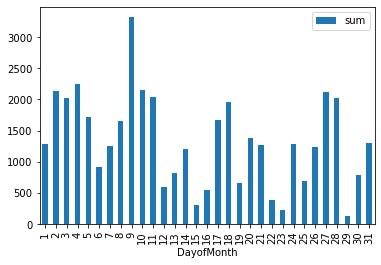

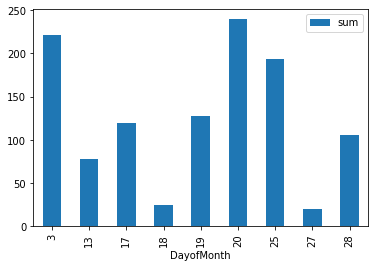

In [33]:
# Importing pandas as pd
import pandas as pd

# Dataframe data has been assigned to the variable "df"
df = pd.DataFrame(data)

# New dataframe called data3 was created with the variables pertinent for the analysis 
data3= df[["Month","DayofMonth","DepTime","ArrTime","UniqueCarrier","ArrDelay","DepDelay","Origin"]]

# Dataframe filters arrival delays over 15 min during the morning, from 6 am to 12 pm in HOU airport
data_HOU_am_arr = data3[(df.Origin == "HOU")&(df.ArrDelay > 15)&(df.ArrTime >= 600)&(df.ArrTime <= 1200)]

# Dataframe filters arrival delays over 15 min during the afternoon, from 12:01 pm and 6 pm in HOU airport
 
data_HOU_pm_arr = data3[(df.Origin == "HOU")&(df.ArrDelay > 15)&(df.ArrTime >= 1201)&(df.ArrTime <= 1800)]

# Dataframe filters departure delays over 15 min during the evening, from 6:01 pm and 12 am in HOU airport
data_HOU_night_arr = data3[(df.Origin == "HOU")&(df.ArrDelay > 15)&(df.ArrTime >= 1801)&(df.ArrTime <= 2400)]

# Print results codes:
print("\033[1m" + 'Southwest Airlines (WN) and Envoy Airlines (MQ) have the highest arrival delay times during the mornings.'+"\033[0m")
print('')
# Group by carrier and perform count, max, mean and sum of arrival delays over 15 min during the am in HOU 
print(data_HOU_am_arr.groupby('UniqueCarrier').ArrDelay.agg(['count','max','mean','sum']))
print('')
# Calculate the grand total amount of arrival delays during the mornings   
print("\033[1m" +'The total time of arrival delays during the mornings of January and February 2011 was:'+"\033[0m")
# Variable "total_am_arrHOU" calculates the sum of arrival delay times over 15 min in HOU airport during the am
total_am_arrHOU = data_HOU_am_arr['ArrDelay'].sum()
# Variable containing results is printed
print(total_am_arrHOU)
print('')

#------------------------------------------------------------------------------------------------------

# Print results codes:
print("\033[1m" + 'Southwest Airlines (WN) and Envoy Airlines (MQ) have the highest arrival delay times during the afternoons.'+"\033[0m")
print('')
# Group by carrier and performs count, max, mean and sum of arrival delays over 15 min during the pm in HOU
print(data_HOU_pm_arr.groupby('UniqueCarrier').ArrDelay.agg(['count','max','mean','sum']))
print('')
#Calculate the grand total amount of arrival delays during the afternoons 
print("\033[1m" +'The total time of arrival delays during the afternoons of January and February 2011 was:'+"\033[0m")
# Variable "total_pm_arrHOU" calculates the sum of arrival delay times over 15 min in HOU airport during the pm
total_pm_arrHOU = data_HOU_pm_arr['ArrDelay'].sum()
# Variable containing results is printed
print(total_pm_arrHOU)
print('')

#------------------------------------------------------------------------------------------------------

# Print results codes:
print("\033[1m" + 'Southwest Airlines (WN) and JetBlue Airlines (B6) have the highest arrival delay times during the evenings.'+"\033[0m")
print('')
# Group by carrier and performs count, max, mean and sum of arrival delays over 15 min deruing the evening (night) in HOU
print(data_HOU_night_arr.groupby('UniqueCarrier').ArrDelay.agg(['count','max','mean','sum']))
print('')
#Calculate the total amount of arrival delays during the evenings 
print("\033[1m" +'The total time of arrival delays during the evenings of January and February 2011 was:'+"\033[0m")
# Variable "total_night_arrHOU" calculates the sum of arrival delay times over 15 min in HOU airport during the evenings (night)
total_night_arrHOU = data_HOU_night_arr['ArrDelay'].sum()
# Variable containing results is printed
print(total_night_arrHOU)
print('')
print('')
print('')
#-----------------------------------------------------------------------------------------------------

# I created a new dataframe filtering the origin, delays and month to calculate the grand total count of delays
#during each month.

# January
# Dataframe filters by origin HOU, arrival delays over 15 min and "Month" = 1 (January)
data_HOU_jan_countarr = data2[(df.Origin == "HOU")&(df.ArrDelay > 15)&(df.Month == 1)]
# Grouping by carrier, function counts arrival delays  
data_HOU_jan_countarr.groupby('UniqueCarrier').ArrDelay.agg(['count'])
# Variable "arr_janHOU" counts the arrival delays 
arr_janHOU = data_HOU_jan_countarr['ArrDelay'].count()
print("\033[1m" + '**The grand total of number of arrival delays over 15 minutes during the month of January 2011 was:' +"\033[0m")
# Variable containing results is printed
print(arr_janHOU)
print('')

# February
# Dataframe filters by origin HOU, arrival over 15 min and "Month" = 2 (February)
data_HOU_feb_countarr = data2[(df.Origin == "HOU")&(df.ArrDelay > 15)&(df.Month == 2)]
# Grouping by carrier, function counts arrival delays
data_HOU_feb_countarr.groupby('UniqueCarrier').ArrDelay.agg(['count'])
# Variable "arr_febHOU" counts the arrival delays
arr_febHOU= data_HOU_feb_countarr['ArrDelay'].count()
print("\033[1m" + '**The grand total of number of arrival delays over 15 minutes during the month of February 2011 was:' +"\033[0m")
# Variable containing results is printed
print(arr_febHOU)
print('')

#----------------------------------------------------------------------------------------------------

# To create the graphs I am using matplotlib inline
%matplotlib inline

# Graph tittle and description
print("\033[1m" +'Arrival Delays per Month & Day'+"\033[0m")
print("\033[1m" +'The first graph show the results from January 2011 & the second graph show the results from February 2011'+"\033[0m")

# Filtering to use only month = 1 (January)
jan_arrHOU = data2[(df.Origin == "HOU")&(df.ArrDelay > 15)&(df.Month == 1)]

# Create the graph grouping by day of the month adding all the arrival delays per day.
jan_arrHOU.groupby('DayofMonth').ArrDelay.agg(['sum']).plot(kind='bar')

#Filtering to use only month = 2 (February)
feb_arrHOU = data2[(df.Origin == "HOU")&(df.ArrDelay > 15)&(df.Month == 2)]

# Create the graph grouping by day of the month adding all the arrival delays per day.
feb_arrHOU.groupby('DayofMonth').ArrDelay.agg(['sum']).plot(kind='bar')


# <span style="color:olive">Research Results</span>
<br>

### <span style="color:olivedrab">A. IAH Airport Results</span> 

  #### Answers to Research Questions:
  
  **A.1 What is the total count of arrival and departure delays over 15 minutes per month?** <br>
  
  * **Departure Delays**
      
   During the month of January 2011 the IAH airport experienced <span style="color:red">2,130</span> departure delays over 15 minutes and during the month of February 2011 it experienced <span style="color:red">241</span> departure delays over 15 minutes.
   <br>
   
  * **Arrival Delays**
   
   During the month of January 2011 the IAH airport experienced <span style="color:red">2,463</span> arrival delays over 15 minutes and during the month of February 2011 it experienced <span style="color:red">251</span> arrival delays over 15 minutes. <br>
   
      
  **A.2 What days of the month recorded the highest number of arrival and departure delays?** <br>
  
  * **Departure Delays**
      
   The IAH airport during January 2011 experienced the highest number departure delays during the days <span style="color:blue">2nd, 3rd, 9th, 20th and 27th </span> and during February 2011 it experienced the higher number of departure delays during the days <span style="color:blue">25th, 26th, 27th and 28th</span>.
   <br>
   
  * **Arrival Delays**
   
   The IAH airport during January 2011 experienced the highest number arrival delays during the days <span style="color:blue">2nd, 3rd, 9th, 10th, 18th, 20th, 24th and 27th </span> and during February 2011 it experienced the higher number of departure delays during the days <span style="color:blue">25th, 26th, 27th and 28th</span>.
   <br>
  
  
  **A.3 Durring what times of the day do airlines experience most arrival and departure delays?** <br>
  
  * **Departure & Arrival Delays**
      
   The IAH airport during January and February 2011 experienced the highest number of departure delays during the <span style="color:green">evenings, from 6 pm to 12 pm</span> and it experienced the highest number of arrival delays during the same time period during the <span style="color:green">evenings, from 6 pm to 12 pm</span> as well.
   <br>
   
   
   
  **A.4 Which airlines experienced the highest number of arrival and departure delays durring the mornings, afternoons and evenings?*** <br>
  
   * **Departure Delays**
    
   <span style="color:indigo">Continental Airlines (CO)</span> and <span style="color:indigo">Express Jet (XE)</span> had the highest departure delay times during the mornings, afternoons and evenings on January and February 2011.<br>
 
 
   
  * **Arrival Delays**
   
  <span style="color:indigo">Continental Airlines (CO)</span> and <span style="color:indigo">Express Jet (XE)</span> had the highest arrival delay times during the mornings, afternoons and evenings on January and February 2011.<br>
 <br>
 
 
 ### <span style="color:olivedrab">B. HOU Airport Results</span> 

  #### Answers to Research Questions:
  
  **B.1 What is the total count of arrival and departure delays over 15 minutes per month?** <br>
  
  * **Departures Delays**
      
   During the month of January 2011 the HOU airport experienced <span style="color:red">1,241</span> departure delays over 15 minutes and during the month of February 2011 it experienced <span style="color:red">8</span> departure delays over 15 minutes.
   <br>
   
  * **Arrival Delays**
   
   During the month of January 2011 the IAH airport experienced <span style="color:red">1,035</span> arrival delays over 15 minutes and during the month of February 2011 it experienced <span style="color:red">9</span> arrival delays overy 15 minutes. <br>
   
      
  **B.2 What days of the month recorded the highest number of arrival and departure delays?** <br>
  
  * **Departure Delays**
      
   The HOU airport during January 2011 experienced the highest number departure delays during the days <span style="color:blue">2nd, 3rd, 4th, 9th, 10th, 11th, 27th and 28th </span> and during February 2011 it experienced the higher number of departure delays during the days <span style="color:blue">3rd, 17th, 20th and 25th</span>.
   <br>
   
  * **Arrival Delays**
   
   The IAH airport during January 2011 experienced the highest number arrival delays during the days <span style="color:blue">2nd, 4th, 9th, 10th, 11th, 27th and 28th</span> and during February 2011 it experienced the higher number of departure delays during the days <span style="color:blue">3rd, 20th and 25th</span>.
   <br>
  
  
  **B.3 Durring what times of the day do airlines experience most arrival and departure delays?** <br>
  
  * **Departure & Arrival Delays**
      
   The HOU airport during January and February 2011 experienced the highest number of departure delays during the <span style="color:green">evenings, from 6 pm to 12 pm</span> and it experienced the highest number of arrival delays during the same time period during the <span style="color:green">evenings, from 6 pm to 12 pm</span> as well.
   <br>
   
   
   
  **B.4 Which airlines experienced the highest number of arrival and departure delays durring the morning, afternoona and evening?*** <br>
  
   * **Departure Delays**
    
   <span style="color:indigo">Southwest Airlines (WN)</span> and <span style="color:indigo">Envoy Airlines (MQ)</span> had the highest departure delay times during the mornings and <span style="color:indigo">Southwest Airlines (WN)</span> and <span style="color:indigo">JetBlue Airline (B6)</span> had the highest departure delay times during the afternoon and evenings of January and February 211.<br>
   
   
  * **Arrival Delays**
   
  <span style="color:indigo">Southwest Airlines (WN)</span> and <span style="color:indigo">Envoy Airlines (MQ)</span> had the highest arrival delay times during the mornings and afternoons and <span style="color:indigo">Southwest Airlines (WN)</span> and <span style="color:indigo">JetBlue Airlines (B6)</span> had the highest arrival delay times during evenings of January and February 2011.<br>
  
  

# <span style="color:olive">Conclusion</span>
<br>

**The relationship between flights arrival and departure delays can be used to forecast airport traffic. Based on the findings I can recommend scheduling and staffing practices that takes into consideration the key findings of the analysis. I believe that having a larger number of employees scheduled during higher volumes of traffic and making the pertinent staffing decisions to ensure enough personnel is on the schedule during that time will increase the probabilities of higher level of customer service satisfaction and operational efficiency. Having data from one complete year can help to further recognize patterns and provide a richer recommendation.**
<br>

#### Above is the complete recomendation 
<br>





#### For this analysis, my conclusions will be stated in the recommendation letter to each Airport Operation's Managers. Data exploration with full statistical analysis and graphs would be included as an appendix in the recommendation letter.
<br>
(Names and dates have been imagined for the purpose of this exercise)
<br>


**<span style="color:olivedrab">Scheduling and Staffing recommendation for IAH Airport</span>**
<br>
<br>

**Letter for Staffing and Scheduling Recommendation For Q1 of Year Starting on January 1st, 2012**
<br>

October 17, 2012<br>
<br>

John Smith<br>
Operations Manager<br> 
IAH Airport<br>
2800 N Terminal Rd,<br>
Houston, TX 77032<br>
<br>

Dear Mr. John Smith,<br>
<br>
Please find below our recommendations for your staffing and scheduling needs for Q1 2012.
<br>
<br>


#### Analysis

**Goal:** Recommend staffing and scheduling needs for Q1 2012.<br>
**Concern:** Minimize customer service complaints and increase efficiency.<br>
**Date Range:** January 1st, 2012 to March 31st 2012.<br>
<br>

#### Key Findings:
* During the month of January 2011 the IAH airport experienced **<code style="background:yellow;color:black">2,130</code>** departure delays over 15 minutes and during the month of February 2011 it experienced **<code style="background:yellow;color:black">241</code>** departure delays over 15 minutes.
<br>
* During the month of January 2011 the IAH airport experienced **<code style="background:yellow;color:black">2,463</code>** arrival delays over 15 minutes and during the month of February 2011 it experienced **<code style="background:yellow;color:black">2,130</code>**251</code>** arrival delays over 15 minutes. 
<br> 
* The IAH airport during January 2011 experienced the highest number departure delays during the days **2nd, 3rd, 9th, 20th and 27th** and during February 2011 it experienced the higher number of departure delays during the days **25th, 26th, 27th and 28th**.
<br>
* The IAH airport during January 2011 experienced the highest number arrival delays during the days **2nd, 3rd, 9th, 10th, 18th, 20th, 24th and 27th** and during February 2011 it experienced the higher number of departure delays during the days **25th, 26th, 27th and 28th**.
<br>
* The IAH airport during January and February 2011 experienced the highest number of departure delays during the **evenings, from 6 pm to 12 pm** and it experienced the highest number of arrival delays during the same time period, **evenings, from 6 pm to 12 pm** as well.
<br>
*  **<code style="background:yellow;color:black">Continental Airlines (CO)</code>** and **<code style="background:yellow;color:black">Express Jet (XE)</code>** had the highest departure delay times during the mornings, afternoons and evenings during January and February 2011.
<br>
* **<code style="background:yellow;color:black">Continental Airlines (CO)</code>** and **<code style="background:yellow;color:black">Express Jet (XE)</code>** had the highest arrival delay times during the mornings, afternoons and evenings during January and February 2011.
<br>
<br>




#### Recommendation
**Here are the 3 recommendations that will increase the probabilities of achieving your goals:**

**1.	Traffic Volume:**
<br>
* Our view is that during evenings the airport traffic increases due to the volume of flights and departure and arrival delays. Based on our findings described above, terminals hosting Continental Airlines and Express Jet Airlines have a higher tendency of having more traffic due to higher volume of flights and departure and arrival delays.
<br>
* Our view is that for the month of February the traffic reduces due to the reduction in flights and arrival and departure delays. Departure delays account for 11.3% of January levels and arrival delays account for 10.2% of January levels.  
<br>

**2.	Schedule:**
<br>
* Our view is that for the month of January, Sundays and Mondays have a higher occurrence of arrival and departure delays during the first two weeks of the month. The last two weeks of the month, January experienced higher volume of arrival and departure delays on Thursdays and Fridays.   
<br>
* Our view is that for the month of February, Thursdays and Fridays have a higher occurrence of arrival and departure delays all throughout the month. 
<br>

**3.	Personnel:**
<br>
* Our view is that there a relationship between flights arrival and departure delays and airport traffic; based on our findings we can recommend scheduling and staffing practices that takes into consideration the key findings above. We believe that having a larger number of employees scheduled during higher volumes of traffic and making the pertinent staffing decisions to ensure enough personnel is on the schedule during that time will increase the probabilities for you and your institution of achieving your goals.   
<br>
<br>



**Best Regards,**
<br>

#### Jesus Olivera
<br>

**Jesus Olivera**<br>
**Research Data Analyst**<br>
**Student at Yeshiva University**<br> 

<br>



**<span style="color:olivedrab">Scheduling and Staffing recommendation for HOU Airport</span>**
<br>
<br>

**Letter for Staffing and Scheduling Recommendation For Q1 of Year Starting on January 1st, 2012**
<br>

October 17, 2012<br>
<br>

Adam Smith<br>
Operations Manager<br> 
HOU Airport<br>
7800 Airport Blvd<br>
Houston, TX 77061<br>
<br>

Dear Mr. Adam Smith,<br>
<br>
Please find below our recommendations for you staffing and scheduling needs for Q1 2012.
<br>
<br>


#### Analysis

**Goal:** Recommend staffing and scheduling needs for Q1 2012.<br>
**Concern:** Minimize customer service complaints and increase efficiency.<br>
**Date Range:** January 1st, 2012 to March 31st 2012.<br>
<br>

#### Key Findings:
* During the month of January 2011 the HOU airport experienced **<code style="background:yellow;color:black">1,241</code>** departure delays over 15 minutes and during the month of February 2011 it experienced **<code style="background:yellow;color:black">8</code>** departure delays over 15 minutes.
<br>
* During the month of January 2011 the HOU airport experienced **<code style="background:yellow;color:black">1,035</code>** arrival delays over 15 minutes and during the month of February 2011 it experienced **<code style="background:yellow;color:black">9</code>**251</code>** arrival delays over 15 minutes. 
<br> 
* The IAH airport during January 2011 experienced the highest number departure delays during the days **2nd, 3rd, 4th, 9th, 10th, 11th, 27th and 28th** and during February 2011 it experienced the higher number of departure delays during the days **3rd, 17th, 20th and 25th**.
<br>
* The IAH airport during January 2011 experienced the highest number arrival delays during the days **2nd, 4th, 9th, 10th, 11th, 27th and 28th** and during February 2011 it experienced the higher number of departure delays during the days **3rd, 20th and 25th**.
<br>
* The IAH airport during January and February 2011 experienced the highest number of departure delays during the **evenings, from 6 pm to 12 pm** and it experienced the highest number of arrival delays during the same time period, **evenings, from 6 pm to 12 pm** as well.
<br>
*  **<code style="background:yellow;color:black">Southwest Airlines (WN)</code>** and **<code style="background:yellow;color:black">Envoy Airlines (MQ)</code>** had the highest departure delay times during the mornings and <code style="background:yellow;color:black">Southwest Airlines (WN)</code>** and **<code style="background:yellow;color:black">JetBlue Airline (B6)</code>** had the highest departure delay times during the afternoons and evenings on January and February 2011.
<br>
* **<code style="background:yellow;color:black">Southwest Airlines (WN)</code>** and **<code style="background:yellow;color:black">Envoy Airlines (MQ)</code>** had the highest arrival delay times during the mornings and afternoons, and <code style="background:yellow;color:black">Southwest Airlines (WN)</code>** and **<code style="background:yellow;color:black">JetBlue Airlines (B6)</code>** had the highest arrival delay times during the evenings on January and February 2011.  
<br>
<br>




#### Recommendation
**Here are the 3 recommendations that will increase the probabilities of achieving your goals:**

**1.	Traffic Volume:**
<br>
* Our view is that during evenings the airport traffic increases due to the volume of flights and departure and arrival delays. Based on our findings described above, terminals hosting Southwest Airlines (WN), Envoy Airlines (MQ) and JetBlue Airline (B6) have a higher tendency of having more traffic due to higher volume of flights and departure and arrival delays.
<br>
* Our view is that for the month of February the traffic reduces due to the reduction in flights and arrival and departure delays. Departure delays account for 0.6% of January levels and arrival delays account for 0.9% of January levels.  
<br>

**2.	Schedule:**
<br>
* Our view is that for the month of January, Sundays, Mondays, and Tuesdays have a higher occurrence of arrival and departure delays during the first two weeks of the month. During the last two weeks of the month, January experienced higher volume of arrival and departure delays on Thursdays and Fridays.   
<br>
* Our view is that for the month of February, Thursdays, Fridays, and Sundays have a higher occurrence of arrival and departure delays all throughout the month. 
<br>

**3.	Personel:**
<br>
* Our view is that there a relationship between flights arrival and departure delays and airport traffic; based on our findings we can recommend scheduling and staffing practices that takes into consideration the key findings above. We believe that having a larger number of employees scheduled during higher volumes of traffic and making the pertinent staffing decisions to ensure enough personnel is on the schedule during that time will increase the probabilities for you and your institution of achieving your goals.   
<br>
<br>



**Best Regards,**
<br>

#### Jesus Olivera
<br>

**Jesus Olivera**<br>
**Research Data Analyst**<br>
**Student at Yeshiva University**<br> 



